***LASSO REGRESSION***

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [2]:
x = np.array(10*np.random.randn(37,5))

In [11]:
df = pd.DataFrame(x, columns = ['Feature'+str(l) for l in range(1,6)])

In [12]:
df.head()

,Feature1,Feature2,Feature3,Feature4,Feature5
0,-16.161677,6.238691,10.178106,-1.584077,4.546398
1,-6.083506,-1.324845,-2.893753,6.727101,-3.204257
2,-15.726253,13.877647,-8.805490,3.697812,-4.838743
3,5.025755,8.341442,2.784453,3.883224,-3.359112
4,0.177272,-13.007774,18.242472,6.831709,-4.626947


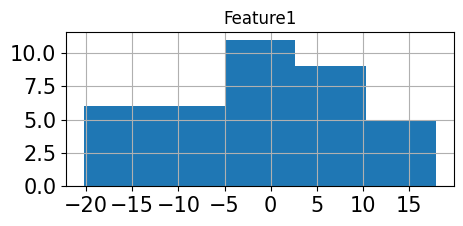

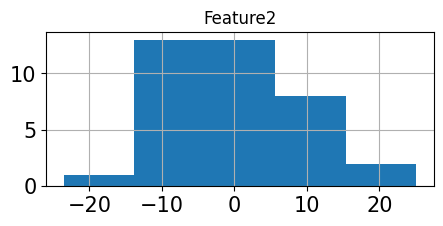

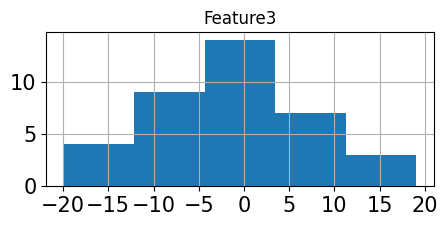

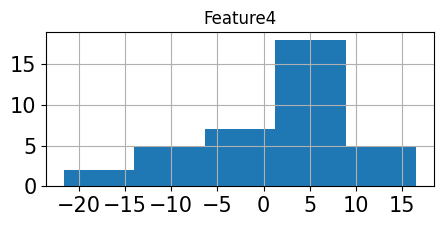

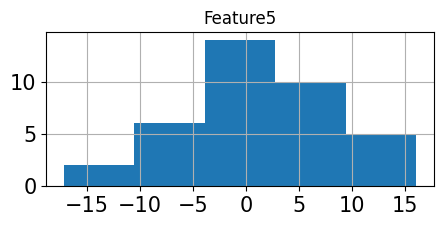

In [14]:
for i in df.columns:
    df.hist(i, bins = 5, xlabelsize=15, ylabelsize=15, figsize = (5,2))

In [15]:
df['y']=5*df['Feature1']**2+13*df['Feature2']+0.1*df['Feature3']**2*df['Feature1'] \
+2*df['Feature4']*df['Feature5']+0.1*df['Feature5']**3+0.8*df['Feature1']*df['Feature4']*df['Feature5'] \
+30*np.random.normal(loc=5,scale=2)

In [16]:
df.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,y
0,-16.161677,6.238691,10.178106,-1.584077,4.546398,1510.901024
1,-6.083506,-1.324845,-2.893753,6.727101,-3.204257,424.348438
2,-15.726253,13.877647,-8.805490,3.697812,-4.838743,1676.158047
3,5.025755,8.341442,2.784453,3.883224,-3.359112,359.417526
4,0.177272,-13.007774,18.242472,6.831709,-4.626947,-37.537654


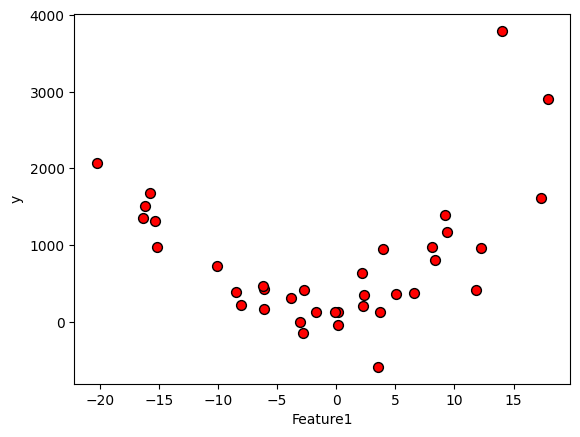

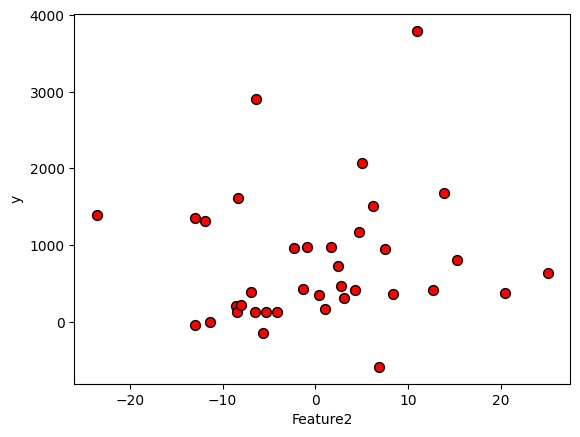

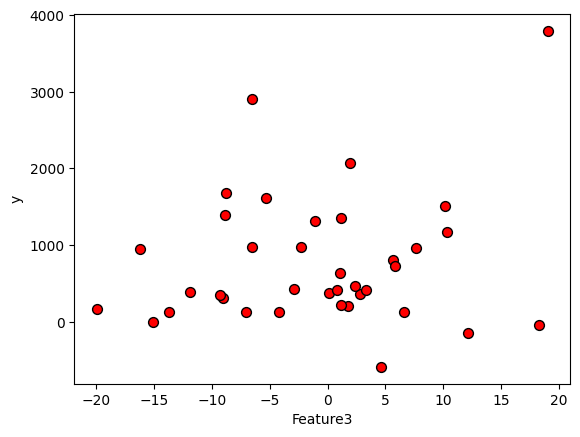

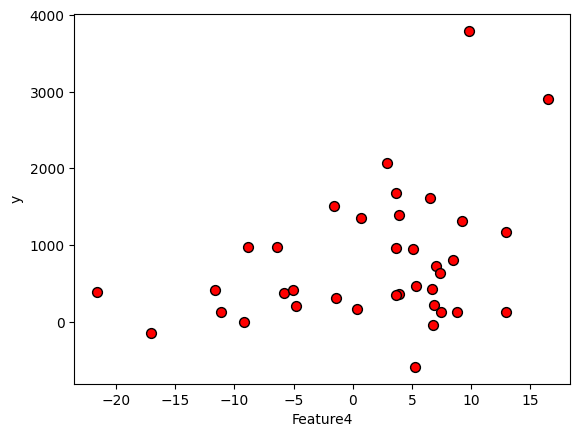

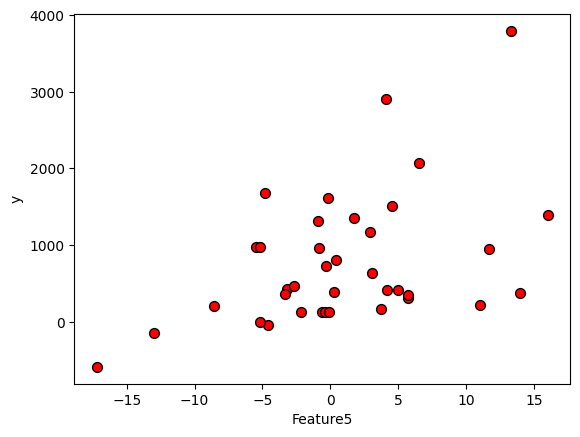

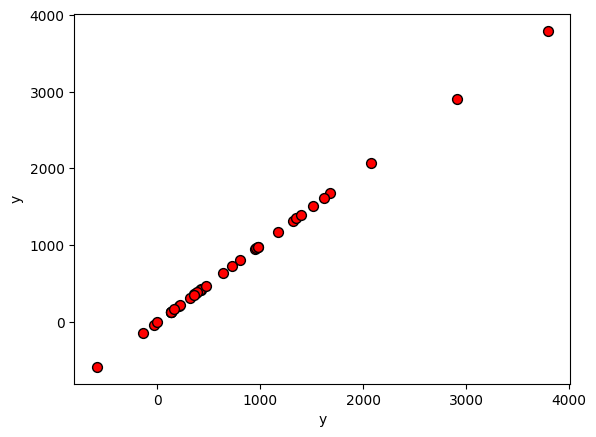

In [23]:
for i in df.columns:
    df.plot.scatter(i, 'y', edgecolors = (0,0,0), s=50, c='r', grid = False)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
linear_model = LinearRegression()

In [26]:
X_linear = df.drop('y', axis = 1)
y_linear = df['y']

In [27]:
linear_model.fit(X_linear, y_linear)

LinearRegression()

In [28]:
LinearRegression(copy_X = True, fit_intercept = True, n_jobs=1)

LinearRegression(n_jobs=1)

In [29]:
y_pred_linear = linear_model.predict(X_linear)

In [30]:
RMSE_linear = np.sqrt(np.sum(np.square(y_pred_linear-y_linear)))

In [31]:
print("root mean square error :", RMSE_linear)

root mean square error : 4298.496490263977


In [32]:
coeff_linear = pd.DataFrame(linear_model.coef_, index=df.drop('y', axis =1).columns, columns = ['Linear model coefficient'])
coeff_linear

,Linear model coefficient
Feature1,0.595217
Feature2,-0.780852
Feature3,17.702914
Feature4,24.172161
Feature5,51.950356
